# Regular Expressions

Google revolutionized the internet by making it extremely searchable. This kind of power is at your fingertips.
Regular expressions are a set of syntatical tools for matching patterns in text. As scientists, we can use this powerful syntax to do many mundane tasks such as finding and sorting files, find and fixing formatting errors, and reformatting data.

- Navigate the command line more efficiently.
- Quickly find files on the command line based on their content (grep).
- Find and replace a complex expression in many files at once (sed).
- Quickly do math on plain-text columns of data from the command line (awk).




## Metacharacters on the Command Line

Metacharacters are characters that have a special meaning aside from their literal
meaning. Literal characters, on the other hand, are those that are being taken at face
value. Regular expressions are strings made of metacharacters and literal characters. Examples of metacharacters:
- Alphanumeric characters match themselves.
- A dot (`.`) matches any character.
- Repeating patterns are matched with `*` , `+` , and `?` .
- Character sets ( `[]` ) and the or operator ( `|` ) can match alternatives.
- The position markers `^` and `$` match the beginning and end of a line, respectively.
- Parentheses can group things and extract information from matches.

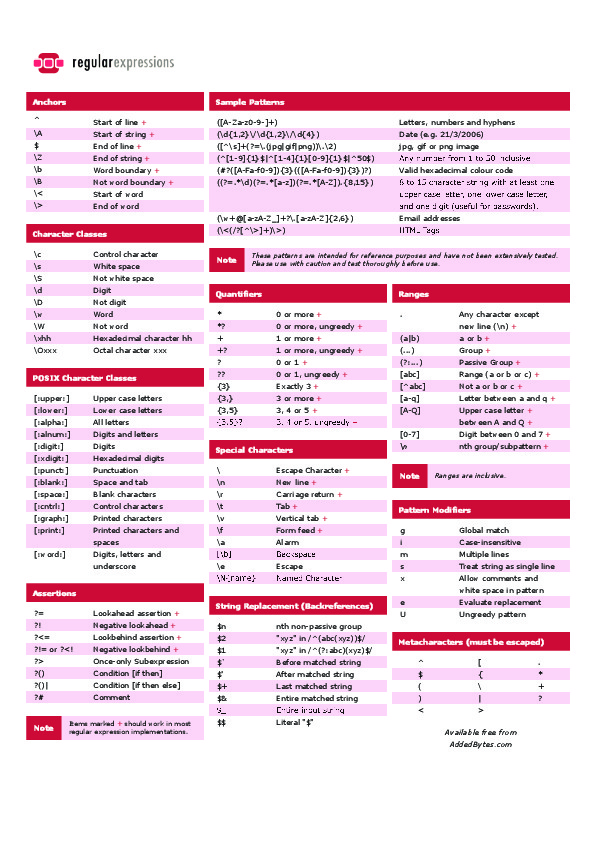

In [1]:
from IPython.display import Image
Image(filename='regular-expressions-cheat-sheet.jpg')

### The wildcard (`*`) --- Zero or more of any character
In the space below, list all files in this directory that end in the extension 'ipynb' on the command line.

In [2]:
# List all files beginning with zero or more of any character, followed by the .ipynb string.
!ls *.ipynb

ch01-the-command-line.ipynb  ch03-containers.ipynb	ch08-regex.ipynb
ch02-python.ipynb	     ch03-containers-pkp.ipynb
ch02-python-pkp.ipynb	     ch04-flow-control.ipynb


### Listing Files with Simple Patterns
Using the ! magic in the notebook, access the terminal.

In [3]:
!ls

ch01-the-command-line.ipynb  DATA
ch02-python.ipynb	     filename
ch02-python-pkp.ipynb	     fubar3
ch03-containers.ipynb	     physics
ch03-containers-pkp.ipynb    __pycache__
ch04-flow-control.ipynb      regular-expressions-cheat-sheet.jpg
ch08-regex.ipynb	     styles
constants.py


In [10]:
# Lets check what is in DATA
!ls -lrth DATA/

total 56K
-rw-r--r-- 1 shahrazad users  11K May  1 10:41 avg_embryo_dist.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c10_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c11_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c12_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c13_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c14_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c15_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c16_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c17_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c18_n1.dat
-rw-r--r-- 1 shahrazad users   53 May  1 10:42 embryodis_c19_n1.dat
drwxr-xr-x 2 shahrazad users 4.0K May  1 10:47 SIZE-1440


In [13]:
# Lets check what is in DATA
!ls -lrth DATA/SIZE-1440/

total 0
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n1.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n19.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n18.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n17.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n16.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n15.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n14.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n13.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n12.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n11.dat
-rw-r--r-- 1 shahrazad users 0 May  1 10:47 embryodis_n10.dat


In [14]:
# To list all files with extension dat in DATA
!ls DATA/*.dat

DATA/avg_embryo_dist.dat   DATA/embryodis_c13_n1.dat  DATA/embryodis_c17_n1.dat
DATA/embryodis_c10_n1.dat  DATA/embryodis_c14_n1.dat  DATA/embryodis_c18_n1.dat
DATA/embryodis_c11_n1.dat  DATA/embryodis_c15_n1.dat  DATA/embryodis_c19_n1.dat
DATA/embryodis_c12_n1.dat  DATA/embryodis_c16_n1.dat


Note that ls goes one level deep into directory, i.e., it does not show all dat files in subdirectories.

### Globally Finding Filenames with Patterns (`find`)
`find` command can recursively search a lot of directories at once. One option is to use it with regular expressions. The syntax is:
```
find [path] -regex "<expression>"
```
With this syntax, the top level of the search will be the indicated . `find` will begin at that location and recursively parse filenames using regular expressions (`-regex`). The expression for which it will seek matches is provided between the double quotes.

In [32]:
!find . -regex ".*\(\.dat\|\.DAT\)"

./DATA/embryodis_c10_n1.dat
./DATA/embryodis_c15_n1.dat
./DATA/embryodis_c19_n1.dat
./DATA/embryodis_c11_n1.dat
./DATA/embryodis_c16_n1.dat
./DATA/embryodis_c14_n1.dat
./DATA/embryodis_c18_n1.dat
./DATA/SIZE-1440/embryodis_n19.dat
./DATA/SIZE-1440/embryodis_n18.dat
./DATA/SIZE-1440/embryodis_n17.dat
./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n13.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n16.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n1.dat
./DATA/SIZE-1440/embryodis_n15.dat
./DATA/SIZE-1440/embryodis_n10.dat
./DATA/embryodis_c13_n1.dat
./DATA/avg_embryo_dist.dat
./DATA/embryodis_c17_n1.dat
./DATA/embryodis_c12_n1.dat
./DATA/avg_embryo_dist.DAT


Note that `find` shows all ".dat" files in the path specified and all the subdirectories.

While the wildcard is available on the command line, it doesn’t mean the same thing on the command line that it does in proper regular expression syntax. On the command line, .* means “one dot (.), then zero or more of any character.” In a regex, it means “zero or more of any character (.).”

The dot character (`.`) is a metacharacter in proper regular expressions. For this reason, the backslash is used before the real dot in “.dat” to indicate it should be taken literally.

### REPRESENTING ANY CHARACTER (`.`)

NOTE This bears repeating. On the command line, the dot does not mean “any character.” In proper regular expressions, however, it does. On the command line, the dot already has a special meaning; to represent “any character,” the `?` can be used instead.

In the previous example, assume we want all files start with and have a label number in 10's:

In [21]:
!find . -regex ".*.\(\.dat\|\.DAT\)"

./DATA/embryodis_c10_n1.dat
./DATA/embryodis_c15_n1.dat
./DATA/embryodis_c19_n1.dat
./DATA/embryodis_c11_n1.dat
./DATA/embryodis_c16_n1.dat
./DATA/embryodis_c14_n1.dat
./DATA/embryodis_c18_n1.dat
./DATA/SIZE-1440/embryodis_n19.dat
./DATA/SIZE-1440/embryodis_n18.dat
./DATA/SIZE-1440/embryodis_n17.dat
./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n13.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n16.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n1.dat
./DATA/SIZE-1440/embryodis_n15.dat
./DATA/SIZE-1440/embryodis_n10.dat
./DATA/embryodis_c13_n1.dat
./DATA/avg_embryo_dist.dat
./DATA/embryodis_c17_n1.dat
./DATA/embryodis_c12_n1.dat


In [34]:
!find . -regex ".*.embryodis_n1.\(\.dat\|\.DAT\)"

./DATA/SIZE-1440/embryodis_n19.dat
./DATA/SIZE-1440/embryodis_n18.dat
./DATA/SIZE-1440/embryodis_n17.dat
./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n13.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n16.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n15.dat
./DATA/SIZE-1440/embryodis_n10.dat
./DATA/SIZE-1440/embryodis_n10.DAT


Indeed, in addition to transforming metacharacters into literals, the ubiquitous backslash transforms many literals into metacharacters.

Examples

end-of-line characters `\n` (linefeed) and `\r` (carriage return)
tab metacharacter `\t`
NULL metacharacter `\0`
whitespace metacharacter `\s`.

In [29]:
!touch file\name

In [30]:
ls *name

filename


In [31]:
!touch file\\name
!ls *name

filename  file\name


### CHARACTER SETS (`[…]`)

A character set matches any one of the enclosed characters.

#### Examples

- Col[ou]mbia Columbia, Colombia
- [Dd]ata Data, data
- [Dd][Aa][Tt][Aa] DATA, data, Data
- 2014[-.]05[-.]10 2014.05.10, 2014-05-10

This makes it easy to avoid worrying about capitalization, varying spellings across the pond, and many other matching issues. In our case, it means that .DAT, .dat, and .data files can all be found with one expression:

In [35]:
!find . -regex ".*.embryodis_n1.\.[Dd][Aa][Tt]"

./DATA/SIZE-1440/embryodis_n19.dat
./DATA/SIZE-1440/embryodis_n18.dat
./DATA/SIZE-1440/embryodis_n17.dat
./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n13.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n16.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n15.dat
./DATA/SIZE-1440/embryodis_n10.dat
./DATA/SIZE-1440/embryodis_n10.DAT


### KEY FEATURES OF CHARACTER SETS
Character sets can be specified in shorthand over a range using a hyphen. For letters, [lmnop] is identical to [l-p]. Each set will match any one of the characters “l” through “p” (like the “p” in “zap” or the “l” in “laser”). This works for both numbers and letters. Thus, [0-9] matches any digit.

In [36]:
!find . -regex ".*.embryodis_n1[1-5]\.[Dd][Aa][Tt]"

./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n13.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n15.dat


A character set can indicate characters that we want to avoid. A caret in the square brackets (`[^{...}]`) denotes a negated character set: it will match anything not in the square brackets. For instance, `[\^aeiou]` matches only consonants.

In [37]:
!find . -regex ".*.embryodis_n1[^{3,7}]\.[Dd][Aa][Tt]"

./DATA/SIZE-1440/embryodis_n19.dat
./DATA/SIZE-1440/embryodis_n18.dat
./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n16.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n15.dat
./DATA/SIZE-1440/embryodis_n10.dat
./DATA/SIZE-1440/embryodis_n10.DAT


Character sets can be combined. `[a-zA-Z]` is valid notation matching all letters, irrespective of case.

In [41]:
!find . -regex ".*.embryodis_n1[^{3,7}]\.[a-zA-Z].*"

./DATA/SIZE-1440/embryodis_n19.dat
./DATA/SIZE-1440/embryodis_n18.dat
./DATA/SIZE-1440/embryodis_n11.dat
./DATA/SIZE-1440/embryodis_n12.dat
./DATA/SIZE-1440/embryodis_n16.dat
./DATA/SIZE-1440/embryodis_n14.dat
./DATA/SIZE-1440/embryodis_n15.dat
./DATA/SIZE-1440/embryodis_n10.dat
./DATA/SIZE-1440/embryodis_n10.DAT


These sets also can be referred to by nicknames, such as `[:alpha:]` (letters), `[:alnum:]` (letters and numbers), `[:lower:]` (lowercase letters), `[:digit:]` (numbers), etc.

Note that you have to use double `[[]]` as follows:

In [49]:
!find . -regextype posix-extended -regex ".*[[:upper:]]"  # Graps all files ends with a capital letter

./DATA
./DATA/embryodis_c10_n1.DAT
./DATA/SIZE-1440/embryodis_n10.DAT
./DATA/avg_embryo_dist.DAT
./TEST


### `grep`, `sed`, and `awk`

`grep`, `sed`, and `awk` are a family of tools that use regular expressions and are available on the command line. They each have different capabilities:

The `grep` command has the basic syntax `grep` . `grep` grabs matched patterns and prints them.
The `sed` command has the basic syntax sed `"s///"` . Sed combines grep with a substitution command.
The `awk` command has the basic syntax `awk pattern [action]`. `awk` handles columns.

#### Finding Patterns in Files (`grep`)

`grep` searches, globally, for regular expressions inside files, based on their content. For example, assume you want to see which of the ipynb files talks about sed, then you type:

In [52]:
!grep " grep " *.ipynb # The blank before and after assures looking for the exact word grep

ch08-regex.ipynb:    "The `sed` command has the basic syntax sed `\"s///\"` . Sed combines grep with a substitution command.\n",
ch08-regex.ipynb:      "ch08-regex.ipynb:    \"The `sed` command has the basic syntax sed `\\\"s///\\\"` . Sed combines grep with a substitution command.\\n\",\r\n",
ch08-regex.ipynb:    "! grep \" sed \" *.ipynb # The blank before and after assures looking for the exact word sed"


#### Finding and Replacing Patterns in Files (`sed`)

`sed` is a tool for substitution. It is essentially the same as `grep`, but has one major extension: once a character string is matched, it can be substituted with something else. Thus, `sed` differs from `grep`, but can duplicate `grep` as well.

The syntax for sed substitution through a whole file is:

```
sed "s/<expression>/<substitution>/g" <inputfile>
```
s (before the first slash) indicates “substitution” and the g (following the final slash) indicates substituting “globally”. Without the g, sed will only replace the first instance of the matched pattern in each line.

In [53]:
!cat fubar3

Introduction to reqular expression
TEST 


In [54]:
! sed "s/to/TO/g" fubar3           # Search for "to" and replace it with "TO" globally

Introduction TO reqular expression
TEST 


In [56]:
!cat fubar3                       # the substitute does not change the file itseld, rather it displays it only on screen

Introduction to reqular expression
TEST 


`sed` substituion can be made even more efficient if multiple replacement tasks are necessary per file.

One way is piping:

In [58]:
! sed "s/to/TO/g" fubar3 | sed "s/TEST/TEST\ CHANGE/g"

Introduction TO reqular expression
TEST CHANGE 


Or using -e flag:

In [59]:
! sed -e "s/to/TO/g" -e "s/TEST/TEST\ CHANGE/g" fubar3

Introduction TO reqular expression
TEST CHANGE 


In [61]:
# You can save the output to a file
! sed -e "s/to/TO/g" -e "s/TEST/TEST\ CHANGE/g" fubar3 > fubar3-v2
! cat fubar3-v2

Introduction TO reqular expression
TEST CHANGE 


### Finding and Replacing a Complex Pattern

Since, sometimes, you’ll need to reuse part of the pattern you matched, `sed` has syntax to hold the match in memory. It uses parentheses. Specifically, the following syntax matches x and remembers the match:

```
\(x\)
```

The file "dates.dat" contains dates with different patterns:

In [1]:
! cat dates.dat

2014-05-01
2014-09-10
2015-10-30
2014.06.24
2014/09/23
2010/12/29
2009/10/05


In [9]:
! grep "\(20[01][0-9]\).*\([0-9][0-9]\).*\([0-9][0-9]\)" dates.dat

2014-05-01
2014-09-10
2015-10-30
2014.06.24
2014/09/23
2010/12/29
2009/10/05


In [6]:
# We want to grap only the year.
# First we have to match all the dates with
! sed "s/\(20[01][0-9]\).*\([0-9][0-9]\).*\([0-9][0-9]\)/\1-\2-\3/g" dates.dat

2014-05-01
2014-09-10
2015-10-30
2014-06-24
2014-09-23
2010-12-29
2009-10-05


### sed Extras
With `sed`, we can use the `d` character to delete all blank lines in the file:

In [11]:
! cat fubar3

Introduction to reqular expression


TEST 


In [13]:
! sed '/^$/d' fubar3

Introduction to reqular expression
TEST 


It can also help us automatically double-space the file. We can do this in a brute-force way by deleting blank lines and appending carriage returns (`\n`) to each line:

In [17]:
! sed -e '/^$/d' -e 's/^\(.\+\)$/\1\n/' fubar3
! sed -e '/^$/d' -e G fubar3
! sed '/^$/d;G' fubar3

Introduction to reqular expression

TEST 

Introduction to reqular expression

TEST 

Introduction to reqular expression

TEST 



In [11]:
! cat phone.txt
! echo 
! sed 's/.*\([0-9]\{3\}\).*\([0-9]\{3\}\).*\([0-9]\{4\}\).*/(\1)\2-\3/' phone.txt
# Note that the {3} is to grap exactly three numbers

390/234/3128
343-344-2425
342.234.4543

(390)234-3128
(343)344-2425
(342)234-4543



You can specify a line number to modify by indicating the line number at the beginning of the command:

In [15]:
! sed -e '1 s/390/343/' -e '1,2 s/343/344/' phone.txt

344/234/3128
344-344-2425
342.234.4543


You can also select lines to modify by pattern matching:

In [22]:
! sed '/^3/ s/$/zzzzzzzzzz$/' phone.txt # Add to the end of selected line
! echo
! sed '/^3/ s/^/zzzzzzzzzz$/' phone.txt # Add to the beginning of selected line
! echo
! sed '/^3/ s/^.*/zzzzzzzzzz$/' phone.txt  # Replace line

390/234/3128zzzzzzzzzz$
343-344-2425zzzzzzzzzz$
342.234.4543zzzzzzzzzz$
442.234.4543

zzzzzzzzzz$390/234/3128
zzzzzzzzzz$343-344-2425
zzzzzzzzzz$342.234.4543
442.234.4543

zzzzzzzzzz$
zzzzzzzzzz$
zzzzzzzzzz$
442.234.4543


### Manipulating Columns of Data (awk)

A lot of data in physics begins in a simple format: columns of numbers in plain-text documents. Fortunately for us, a command-line tool called `awk` was invented long ago to quickly and efficiently sort, modify, and evaluate such files. This tool, a sibling to sed and grep, uses regular expressions to get the job done.

As an introductory example, we can investigate the files in the filesystem. On a Linux platform, a list of colors available to the system is found in the /usr/share/X11 directory. On a Unix (Mac OS X) platform, it is made available in /usr/X11/share/X11.

In [28]:
!cat /usr/X11/share/X11/rgb.txt

255 250 250		snow
248 248 255		ghost white
248 248 255		GhostWhite
245 245 245		white smoke
245 245 245		WhiteSmoke
220 220 220		gainsboro
255 250 240		floral white
255 250 240		FloralWhite
253 245 230		old lace
253 245 230		OldLace
250 240 230		linen
250 235 215		antique white
250 235 215		AntiqueWhite
255 239 213		papaya whip
255 239 213		PapayaWhip
255 235 205		blanched almond
255 235 205		BlanchedAlmond
255 228 196		bisque
255 218 185		peach puff
255 218 185		PeachPuff
255 222 173		navajo white
255 222 173		NavajoWhite
255 228 181		moccasin
255 248 220		cornsilk
255 255 240		ivory
255 250 205		lemon chiffon
255 250 205		LemonChiffon
255 245 238		seashell
240 255 240		honeydew
245 255 250		mint cream
245 255 250		MintCream
240 255 255		azure
240 248 255		alice blue
240 248 255		AliceBlue
230 230 250		lavender
255 240 245		lavender blush
255 240 245		LavenderBlush
255 228 225		misty rose
255 228 225		MistyRose
255 255 255		white
  0   0   0		black
 47  79  79		dark slate gray
 47  79

Note that `awk` can somewhat replicate what `sed` and `grep` do. Given a regular expression to match, `awk` will return the matching lines of a file.

In [35]:
!awk '/puff/' /usr/X11/share/X11/rgb.txt

255 218 185		peach puff


In [36]:
!awk '/144/' /usr/X11/share/X11/rgb.txt

112 128 144		slate gray
112 128 144		SlateGray
112 128 144		slate grey
112 128 144		SlateGrey
 30 144 255		dodger blue
 30 144 255		DodgerBlue
208  32 144		violet red
208  32 144		VioletRed
 30 144 255		DodgerBlue1
144 238 144		PaleGreen2
205  96 144		HotPink3
205  41 144		maroon3
144 238 144		light green
144 238 144		LightGreen


We can select the colors that have 144 in the beginning of their hex strings. The caret tells `awk` to search for a match at the start of each line in the input file.

In [37]:
!awk '/^144/' /usr/X11/share/X11/rgb.txt

144 238 144		PaleGreen2
144 238 144		light green
144 238 144		LightGreen


We can even pick out the only color with 144 in the middle

In [38]:
!awk '/^.*\ 144\ .*/' /usr/X11/share/X11/rgb.txt

 30 144 255		dodger blue
 30 144 255		DodgerBlue
 30 144 255		DodgerBlue1


In addition to just replicating some of `grep`’s capabilities, `awk` can add an action. However, it can only do actions on a column-wise basis. Note that dollar signs ($) indicate columns:

In [48]:
#awk '{print $1$2$3}' /usr/X11/share/X11/rgb.txt
#awk '/^255/{print $1$2$3}' /usr/X11/share/X11/rgb.txt
#!awk '/^.+ +.+144/{print $1$2$3}' /usr/X11/share/X11/rgb.txt
!awk '/^.+ +.+144/' /usr/X11/share/X11/rgb.txt

112 128 144		slate gray
112 128 144		SlateGray
112 128 144		slate grey
112 128 144		SlateGrey
208  32 144		violet red
208  32 144		VioletRed
144 238 144		PaleGreen2
205  96 144		HotPink3
205  41 144		maroon3
144 238 144		light green
144 238 144		LightGreen


The column order can also be switched:

In [52]:
!awk '{if(NR<6){print $3," ",$2," ",$2," "$1}}' /usr/X11/share/X11/rgb.txt

250   250   250  255
255   248   248  248
255   248   248  248
245   245   245  245
245   245   245  245


Or we can modify just one line:

In [56]:
!awk NR==11'{print $1 $2 $3,"\t",$4}' /usr/X11/share/X11/rgb.txt

250240230 	 linen


And finally, we can do math with awk:

In [57]:
!awk NR==11'{print $1,"+",$2,"+",$3,"=",$1+$2+$3}' /usr/X11/share/X11/rgb.txt

250 + 240 + 230 = 720


## Python Regular Expressions
Everything we’ve seen how to do so far in this chapter is also possible in Python. Alternatives to all of these tools exist in the Python regular expression module `re`, which comes as part of the Python standard library. The `re` module allows Python-flavored regular expression pattern matching.

`grep`’s capabilities can be replaced with:

- `re.match(pattern, string)` to match a regular expression pattern to the beginning of a string
- `re.search(pattern, string)` to search a string for the presence of a pattern
- `re.findall( pattern, string*)` to find all occurrences of a pattern in a string

Similarly, the capabilities of sed can be replaced with:

- `re.sub(pattern, replacement, string)` to substitute all occurrences of a pattern found in a string
- `re.subn(pattern, replacement, string)` to substitute all occurrences of a pattern found in a string and return the number of substitutions made

The `re` model provides a few more powerful utilities as well.

- `re.split(pattern, string)` splits a string by the occurrences of a pattern.
- `re.finditer(pattern, string)` returns an iterator yielding a match object for each match.
- `re.compile(pattern)` precompiles a regex for faster matches.

In all of these functions, if a match to a regular expression is not found, then `None` is returned. If a match is found, then a special `MatchObject` is returned.

`MatchObjects` have methods and attributes that allow you to determine the position in the string of the match, the original regular expression pattern, and the values captured by any parentheses with the `MatchObject.groups()` method.

Let’s try to match a date regular expression to some actual dates:

In [58]:
# First, import the regular expression module.
import re

In [59]:
# The string matches the pattern, so a match is returned.
re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2015-12-16')

<_sre.SRE_Match object; span=(0, 10), match='2015-12-16'>

In [60]:
# Assign the match to a variable name for later use
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", '2015-12-16')
print(m)

<_sre.SRE_Match object; span=(0, 10), match='2015-12-16'>


In [61]:
# Find the index in the string of the start of the match.
m.pos

0

In [62]:
# Report all captured groups. This regular expression pattern had no capturing
# parentheses, so no substrings are reported.
m.groups()

()

In [63]:
# Try to match the date pattern against something that is not a date.
m = re.match("20[01][0-9].*[0-9][0-9].*[0-9][0-9]", 'not-a-date')

In [64]:
# Note how None is returned when the match fails.
m is None

True

### The compile() method

To speed up matching multiple strings against a common pattern, it is always a good
idea to compile() the pattern. Compiling takes much longer than matching. However,
once you have a compiled pattern, all of the same functions are available as methods
of the pattern. Since the pattern is already known, you don’t need to pass it in when
you call match() or search() or the other methods. Let’s compile a version of the date
regular expression that has capturing parentheses around the actual date values:

In [65]:
# Compile the regular expression and store it as the re_date variable.
re_date = re.compile("(20[01][0-9]).*([0-9][0-9]).*([0-9][0-9])")

In [66]:
# Use this variable to match against a string.
re_date.match('2014-28-01')

<_sre.SRE_Match object; span=(0, 10), match='2014-28-01'>

In [67]:
# Assign the match to a variable m for later use.
m = re_date.match('2014-28-01')

In [68]:
# Since the regular expression uses capturing parentheses, you can obtain the values
# within them using the groups() method. A tuple that has the same length as
# the number of capturing parentheses is returned.
m.groups()

('2014', '28', '01')

## Regular Expressions Wrap-Up

At this point, your regular expressions skills should include:
- How to speed up command-line use with metacharacters
- How to find files based on patterns in their names (find)
- How to find lines in files based on patterns in their content (grep)
- How to replace text patterns in files (sed)
- How to manipulate columns of data based on patterns (awk)

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()